# Programming Project 1 analysis using EDA tools
- Name:
- Date:
- Version: 

### Import Modules

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
from datetime import datetime

### Load the dataset and save it to a dataframe named 'df'
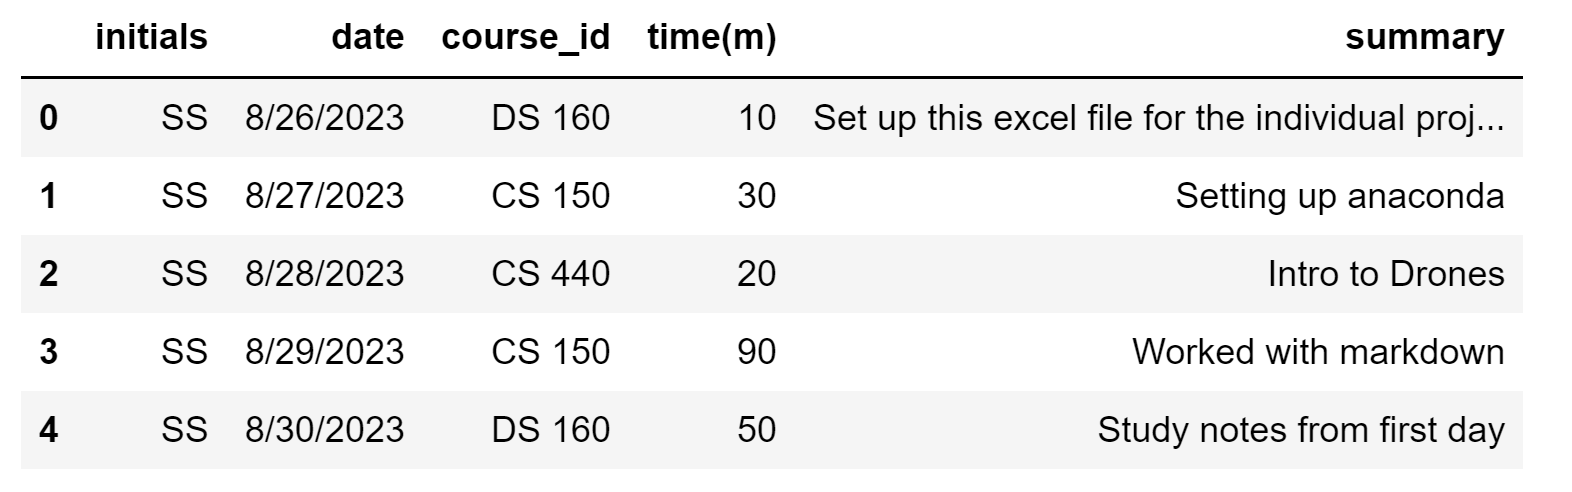

In [2]:
df= pd.read_csv("JMW_Timesheet_Project.csv")


In [3]:
df.columns

Index(['initials', 'date', 'course_id', 'time(m)', 'summary'], dtype='object')

### Investigate your dataset


In [4]:
df.head()

,initials,date,course_id,time(m),summary
0,JW,9/5/2023,DS-160-01,25.0,Listening to podcast
1,JW,9/5/2023,PHIL-301-01,45.0,Short written assignment
2,JW,9/6/2023,DS-160-01,60.0,Finish podcast and summary
3,JW,9/6/2023,FINA-315-01,40.0,Finance writeup for group project
4,JW,9/7/2023,THEO-320-01,90.0,Read Merton book


In [5]:
df.tail()

,initials,date,course_id,time(m),summary
14,JW,9/20/2023,BUSA-301-02,45.0,Study for Test
15,JW,9/24/2023,THEO-320-01,60.0,Merton summary
16,JW,9/24/2023,FINA-315-01,45.0,Finance mindtap
17,JW,10/1/2023,THEO-320-01,50.0,Merton summary
18,JW,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,time(m)
count,18.000000
mean,49.166667
std,19.647631
min,10.000000
25%,41.250000
50%,45.000000
75%,60.000000
max,90.000000


### Summary Statistics
Calculate basic statistics for the 'Time (minutes)' column, such as mean, median, minimum, and maximum. This will give you an overview of how time is distributed across activities. use table and graphical representations
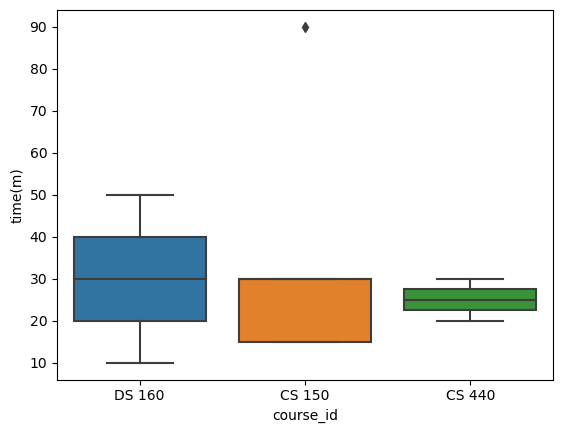

In [7]:
df.sample()

,initials,date,course_id,time(m),summary
9,JW,9/13/2023,THEO-320-01,30.0,Read Merton book


<Axes: xlabel='course_id', ylabel='time(m)'>

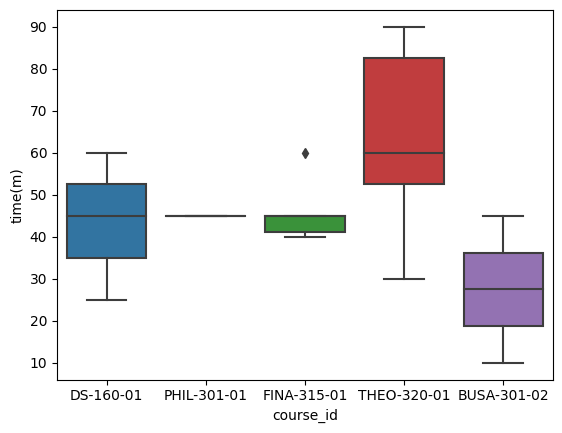

In [8]:
sns.boxplot(x='course_id',y='time(m)', data=df)

### Create two new columns "day" and "day_name" using the "Date" column in which the day will represent the range of days
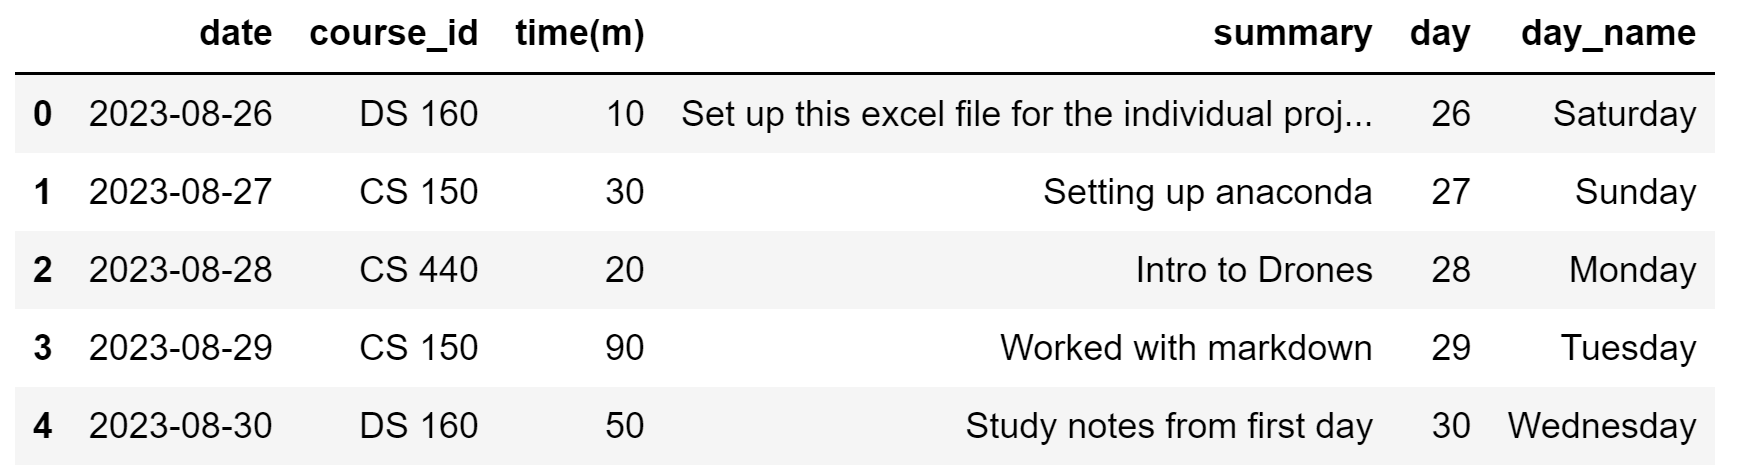

In [9]:
df['date']=pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   initials   19 non-null     object        
 1   date       18 non-null     datetime64[ns]
 2   course_id  18 non-null     object        
 3   time(m)    18 non-null     float64       
 4   summary    18 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 888.0+ bytes


In [11]:
df.head()

,initials,date,course_id,time(m),summary
0,JW,2023-09-05,DS-160-01,25.0,Listening to podcast
1,JW,2023-09-05,PHIL-301-01,45.0,Short written assignment
2,JW,2023-09-06,DS-160-01,60.0,Finish podcast and summary
3,JW,2023-09-06,FINA-315-01,40.0,Finance writeup for group project
4,JW,2023-09-07,THEO-320-01,90.0,Read Merton book


In [12]:
df['day_name'] = df['date'].dt.day_name()


In [13]:
day=range(1, len(df) + 1)

In [14]:
df['day']=day

In [15]:
df.head()

,initials,date,course_id,time(m),summary,day_name,day
0,JW,2023-09-05,DS-160-01,25.0,Listening to podcast,Tuesday,1
1,JW,2023-09-05,PHIL-301-01,45.0,Short written assignment,Tuesday,2
2,JW,2023-09-06,DS-160-01,60.0,Finish podcast and summary,Wednesday,3
3,JW,2023-09-06,FINA-315-01,40.0,Finance writeup for group project,Wednesday,4
4,JW,2023-09-07,THEO-320-01,90.0,Read Merton book,Thursday,5


### Data Visualization:
1. Create a histogram or bar chart to visually represent the distribution of time spent.
2. Create a  bar chart to visually represent the distribution of time spent on different courses and comment on the course you spent most and least time
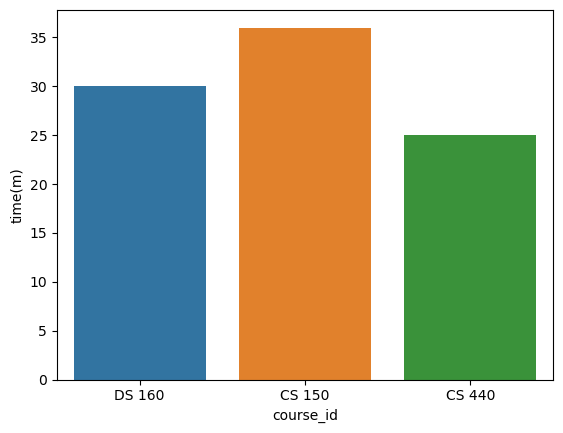

<Axes: xlabel='time(m)', ylabel='Count'>

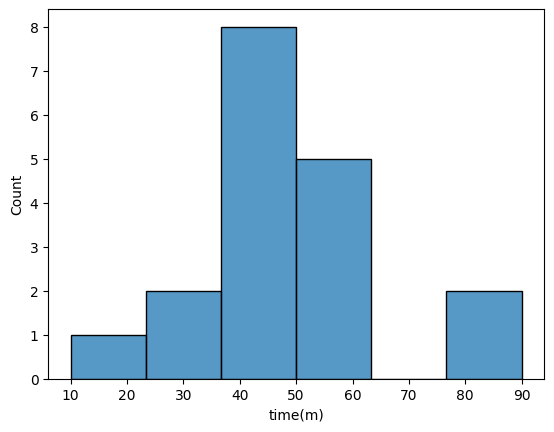

In [16]:
sns.histplot(x= 'time(m)', data=df)

<Axes: xlabel='course_id', ylabel='time(m)'>

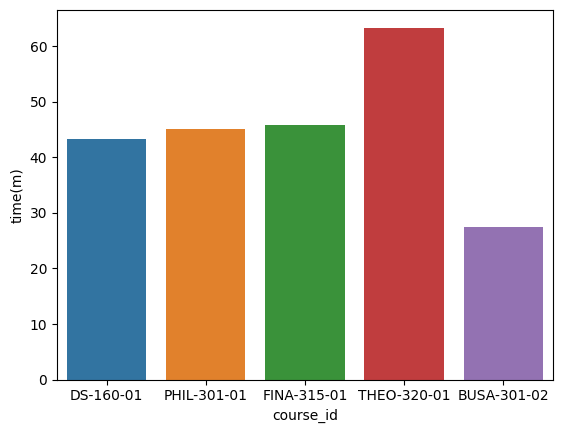

In [17]:
sns.barplot(x= 'course_id', y='time(m)', data=df, ci=False)

### I have spent the most time on my theology class, while I have spent the least time on my business class.

### Activity Counts:

Count the occurrences of each course in the dataset to see how often you engaged in each.

In [18]:
df['course_id'].value_counts()

course_id
FINA-315-01    6
THEO-320-01    6
DS-160-01      3
BUSA-301-02    2
PHIL-301-01    1
Name: count, dtype: int64

### Time Trends:

Plot a line chart to visualize how time spent on activities changes over the observed days.
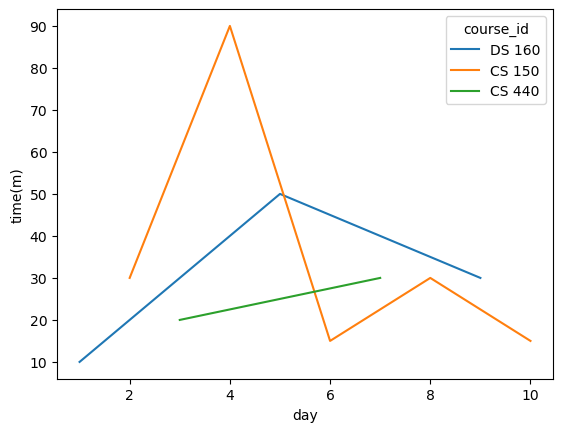

In [19]:
df.columns

Index(['initials', 'date', 'course_id', 'time(m)', 'summary', 'day_name',
       'day'],
      dtype='object')

<Axes: xlabel='day', ylabel='time(m)'>

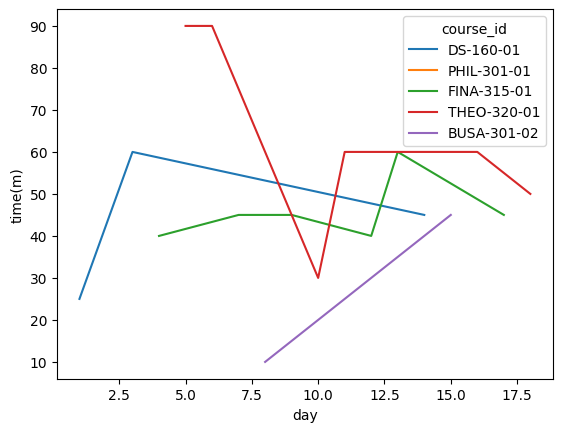

In [20]:
sns.lineplot(x='day', y='time(m)', data=df, hue='course_id', ci=False)
#hue - color plot aspects based on the values of a specific variable

### Course Analysis:

For each course ex.(DS 160, CS 150, CS 440), calculate the total time spent. Which course received the most time, and which received the least?
- Sample print statement: Total time spent on CS160: 180 min

In [27]:
Ds160_time=df.query('course_id=="DS160"')['time(m)'].sum()

In [29]:
print(f"Total time spent on DS160: {Ds160_time} min")

Total time spent on DS160: 0.0 min


In [ ]:
Phil301_time=df.query('')

### Correlations:
- Examine whether there are any correlations between the day and the time spent. For example, do you spend more time on courses over days or less.
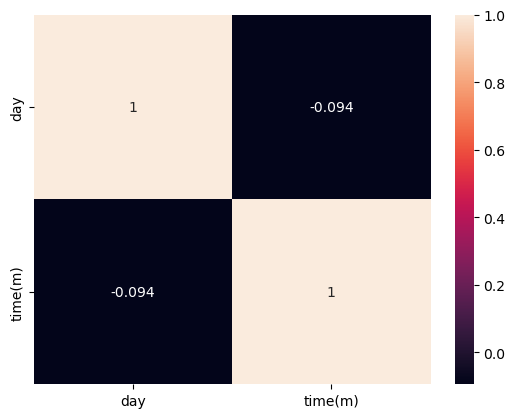

In [40]:
cols=['day', 'time(m)']
heat_map=df[['day',
            'time(m)']].corr()



<Axes: >

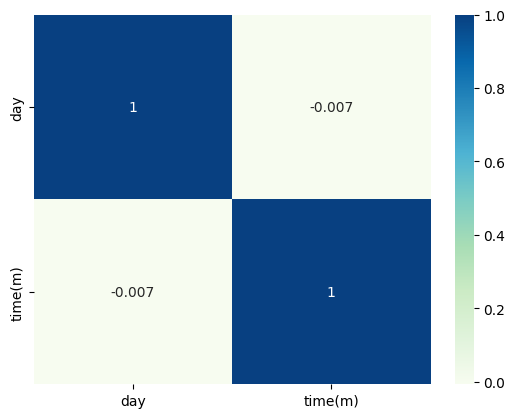

In [41]:
sns.heatmap(heat_map,xticklabels=cols,yticklabels=cols,annot=True,cmap='GnBu')

#### There is a very weak correlation between day and time

# Reflection

#### I found that I spent most of my time on theology, and the least amount of time on my business (BUSA) class. Unfortunately, I am not a theology major and have no plan for it after I am done with school. I think I should spend more time on classes that are directly affected by my major (BUSA, Finance, DS).